## Exploratory Data Analysis

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [20]:
df = pd.read_csv('cleaned_dataset_EDA.csv')

In [21]:
df.shape

(784754, 49)

In [22]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.describe()

,Year,Quarter,Month,DayofMonth,DayOfWeek,OriginWac,DestWac,CRSDepTime,CRSArrTime,CRSElapsedTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,AptPreviousDateDelay,AptNoOfFlight,tmpf,dwpf,relh,drct,sknt,p01i,alti,vsby,gust,skyl1,skyl2,skyl3,skyl4,IsDelay
count,784754.0,784754.0,784754.000000,784754.000000,784754.000000,784754.000000,784754.000000,784754.000000,784754.000000,784754.000000,784754.000000,784754.000000,175106.000000,175106.000000,175106.000000,175106.000000,175106.000000,784754.000000,784754.000000,784754.000000,784754.000000,784754.000000,784754.000000,784754.000000,784754.000000,784754.000000,784754.000000,784754.000000,784754.000000,784754.000000,784754.000000,784754.000000,784754.000000
mean,2017.0,2.0,5.031381,15.867945,3.905389,57.665081,56.187437,13.512345,15.000209,157.305828,936.330547,4.210223,19.705361,3.076359,16.965975,0.061112,26.101870,113.790542,525.638571,69.371703,48.951756,55.720440,176.931190,8.968601,0.002073,29.944102,9.508871,4.195633,7135.291765,8542.542258,5696.457001,1603.253012,0.223135
std,0.0,0.0,0.810905,8.661521,1.987757,26.696523,26.802042,4.941924,5.341170,80.150826,649.304770,2.559683,56.646723,25.235760,34.878501,2.015064,48.143588,86.570455,242.552572,13.460340,14.725223,24.426281,105.190087,5.003241,0.017709,0.179356,1.688264,8.956114,7480.577699,9411.976654,9316.864443,5851.928825,0.416348
min,2017.0,2.0,4.000000,1.000000,1.000000,13.000000,1.000000,0.000000,0.000000,1.000000,66.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,164.000000,24.100000,-11.000000,0.960000,-1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2017.0,2.0,4.000000,8.000000,2.000000,34.000000,34.000000,9.000000,11.000000,96.000000,430.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,358.000000,60.100000,39.000000,37.960000,90.000000,5.000000,0.000000,29.840000,10.000000,0.000000,1600.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,2017.0,2.0,5.000000,16.000000,4.000000,63.000000,52.000000,13.000000,15.000000,139.000000,762.000000,4.000000,1.000000,0.000000,3.000000,0.000000,3.000000,92.000000,438.000000,70.000000,50.000000,57.180000,190.000000,8.000000,0.000000,29.950000,10.000000,0.000000,4500.000000,5000.000000,-1.000000,-1.000000,0.000000
75%,2017.0,2.0,6.000000,23.000000,6.000000,82.000000,82.000000,18.000000,19.000000,196.000000,1235.000000,5.000000,18.000000,0.000000,21.000000,0.000000,33.000000,139.000000,632.000000,79.000000,60.100000,74.930000,260.000000,12.000000,0.000000,30.060000,10.000000,0.000000,10000.000000,15000.000000,10000.000000,-1.000000,0.000000
max,2017.0,2.0,6.000000,31.000000,7.000000,93.000000,93.000000,23.000000,23.000000,669.000000,4983.000000,11.000000,1732.000000,1179.000000,1276.000000,245.000000,1223.000000,722.000000,1124.000000,118.900000,78.100000,100.000000,360.000000,505.000000,1.140000,30.600000,10.000000,46.000000,33000.000000,35000.000000,35000.000000,35000.000000,1.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784754 entries, 0 to 784753
Data columns (total 48 columns):
Year                    784754 non-null int64
Quarter                 784754 non-null int64
Month                   784754 non-null int64
DayofMonth              784754 non-null int64
DayOfWeek               784754 non-null int64
FlightDate              784754 non-null datetime64[ns]
Carrier                 784754 non-null object
Origin                  784754 non-null object
OriginCityName          784754 non-null object
OriginState             784754 non-null object
OriginWac               784754 non-null int64
Dest                    784754 non-null object
DestCityName            784754 non-null object
DestState               784754 non-null object
DestWac                 784754 non-null int64
CRSDepTime              784754 non-null int64
DepTimeBlk              784754 non-null object
CRSArrTime              784754 non-null int64
ArrTimeBlk              784754 non-null obje

### Basic Facts

In [23]:
print("Total records: ", len(df))
print("Records for April: ", sum(df.Month == 4))
print("Records for May: ", sum(df.Month == 5))
print("Records for June: ", sum(df.Month == 6))

Total records:  784754
Records for April:  246087
Records for May:  267954
Records for June:  270713


In [24]:
print('Percent of delayed flight in dataset: ', 100* df.IsDelay.sum()/len(df))

Percent of delayed flight in dataset:  22.313489322768664


In [25]:
df[['Origin','OriginCityName']].drop_duplicates().sort_values('Origin').set_index('Origin')

,OriginCityName
Origin,
ATL,"Atlanta, GA"
BOS,"Boston, MA"
BWI,"Baltimore, MD"
CLT,"Charlotte, NC"
DEN,"Denver, CO"
DFW,"Dallas/Fort Worth, TX"
DTW,"Detroit, MI"
EWR,"Newark, NJ"
IAH,"Houston, TX"


In [26]:
# Convert FlightDate to datetime object
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

### Percent of delay flights in each airport of origin

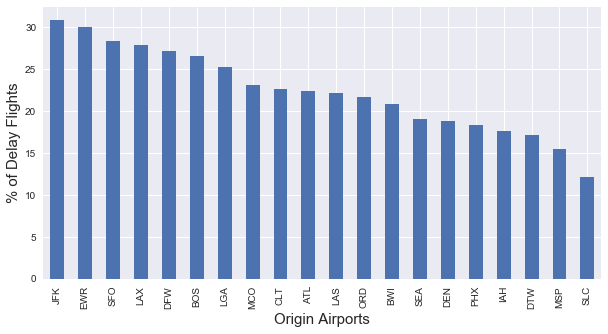

In [44]:
df_delay = 100 * df.groupby(['Origin'])['IsDelay'].sum()/df.groupby(['Origin'])['IsDelay'].count()

fig, ax= plt.subplots(1, 1, figsize=(10, 5))
df_delay.sort_values(ascending=False).plot.bar()
plt.ylabel('% of Delay Flights',size=15)
plt.xlabel('Origin Airports',size=15)
plt.show()

In [28]:
d1 = df.groupby(df.set_index('FlightDate').index.date)['IsDelay'].sum()

### Percentage of delay flight of each carriers

In [29]:
df_carrier_delay = 100 * df.groupby(['Carrier'])['IsDelay'].sum()/df.groupby(['Carrier'])['IsDelay'].count()
df_carrier_delay

Carrier
AA    22.648123
AS    19.291672
B6    32.376770
DL    19.484920
EV    22.643088
F9    24.208234
HA    17.851100
NK    25.192050
OO    19.317690
UA    19.970820
VX    36.553352
WN    24.697820
Name: IsDelay, dtype: float64

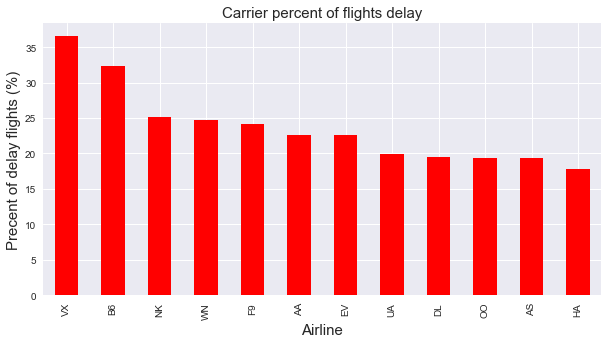

In [45]:
fig, ax= plt.subplots(1, 1, figsize=(10, 5))

df_carrier_delay.sort_values(ascending=False).plot.bar(color='r')
plt.ylabel('Precent of delay flights (%)',size=15)
plt.xlabel('Airline',size=15)
plt.title('Carrier percent of flights delay',size=15)
plt.show()

From the graph above, we can see VX, B6 and NK are the top 3 carriers that have most flight delay during the period.

In [31]:
df_origin = df[['Origin']].drop_duplicates().sort_values('Origin').set_index('Origin')


### Percent of delay flight for each airline at different airports

In [32]:
df_carrier_origin = 100*df.groupby(['Carrier','Origin'])['IsDelay'].sum()/df.groupby(['Carrier','Origin'])['IsDelay'].count()

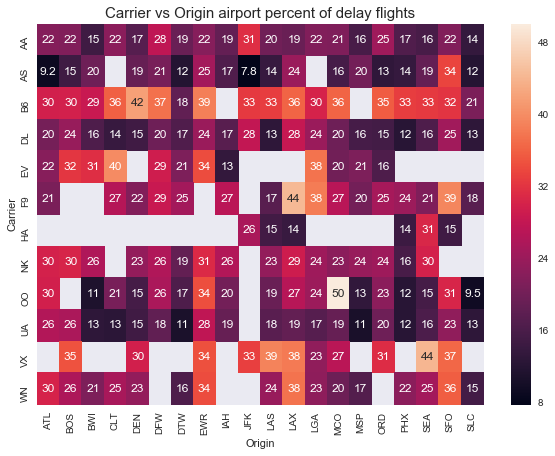

In [33]:
sns.set()
fig, ax1 = plt.subplots(1, 1, figsize=(10, 7))

ax1 = sns.heatmap(df_carrier_origin.unstack(),annot=True)
plt.title('Carrier vs Origin airport percent of delay flights',size=15)
plt.show()

From the heatmap above, we can see JetBlue (B6) haivng the worst performance at all 20 airports. Most of them are above 30% with max at 43%. While the worst airline-airport pair is SkyWest (OO) at Orlando (MCO), 50% of flights were delayed.

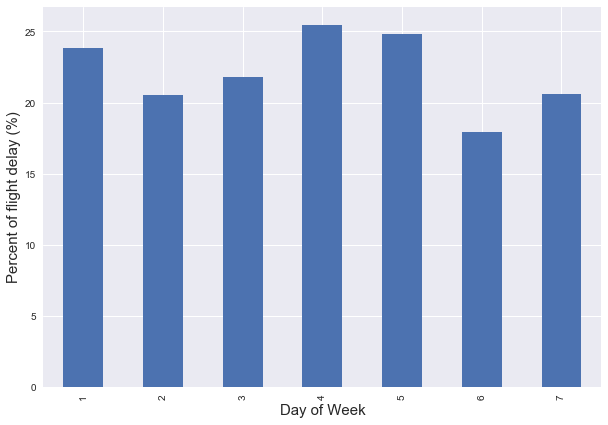

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

df_dayofweeks_delay = 100*df.groupby(['DayOfWeek'])['IsDelay'].sum()/df.groupby(['DayOfWeek'])['IsDelay'].count()
df_dayofweeks_delay.plot.bar()
plt.xlabel('Day of Week', fontsize = 15)
plt.ylabel('Percent of flight delay (%)', fontsize=15)
plt.show()

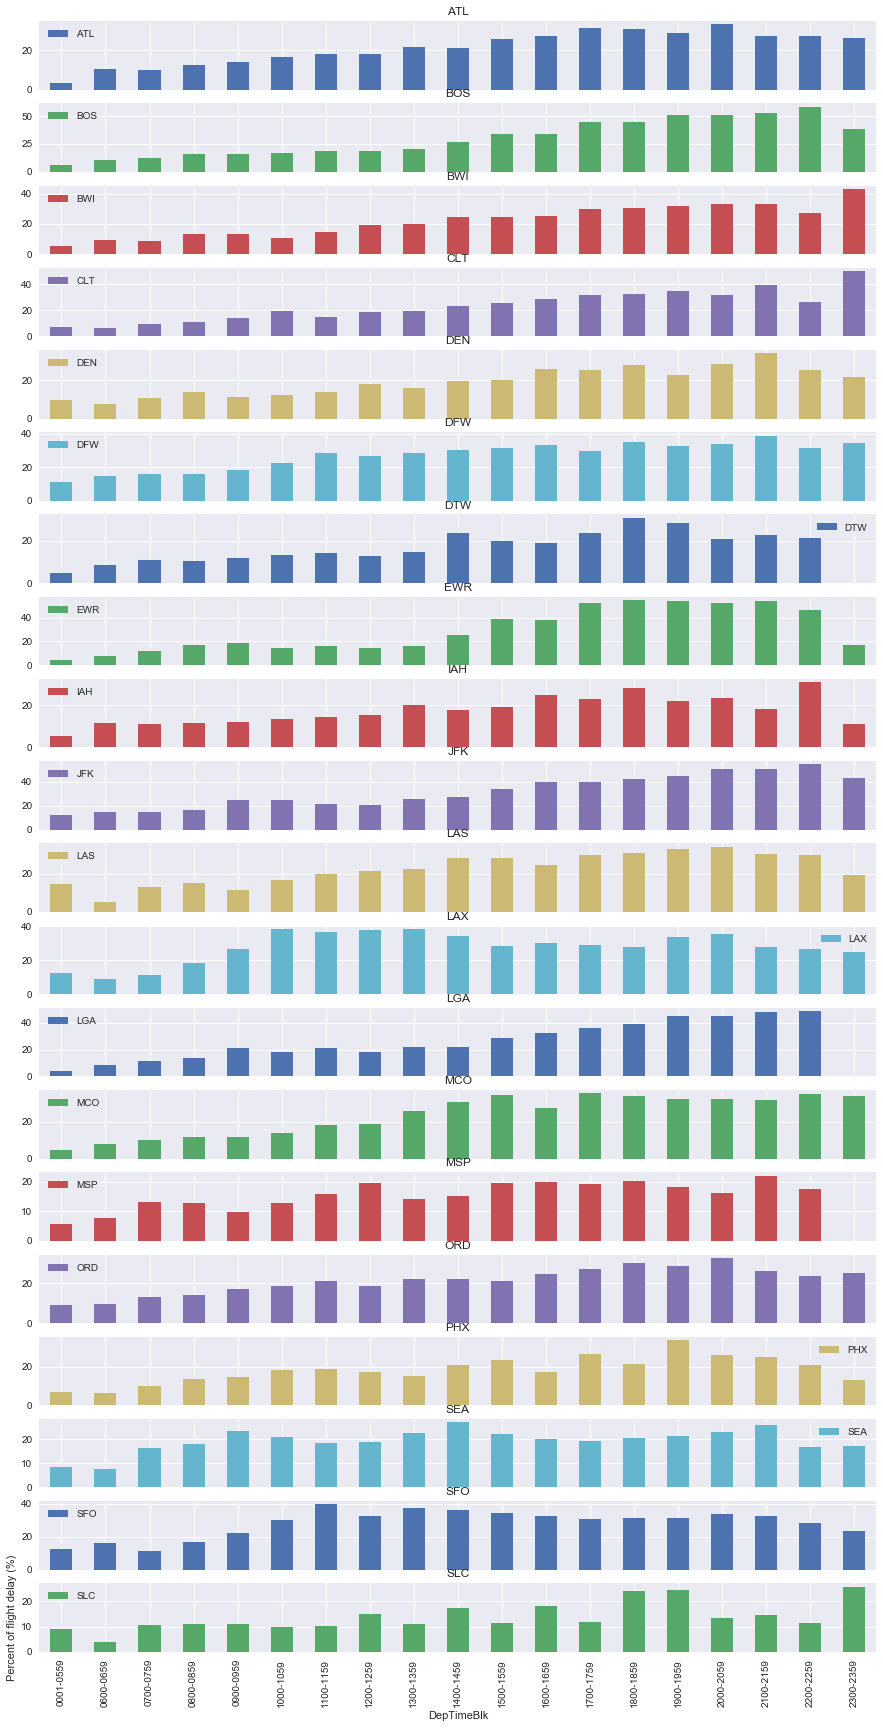

In [35]:

df_deptimeblock_delay = 100 * df.groupby(['DepTimeBlk','Origin'])['IsDelay'].sum()/df.groupby(['DepTimeBlk','Origin'])['IsDelay'].count()
df_deptimeblock_delay.unstack().plot(kind='bar', subplots=True, figsize=(15,30))
plt.ylabel('Percent of flight delay (%)')
plt.savefig('apthourlydelay.png')
plt.show()

From the graph above, we can see different airports have different pattern of flight delays. Some tends to have delay in the middle of the day, while some have more delays when close to evening.

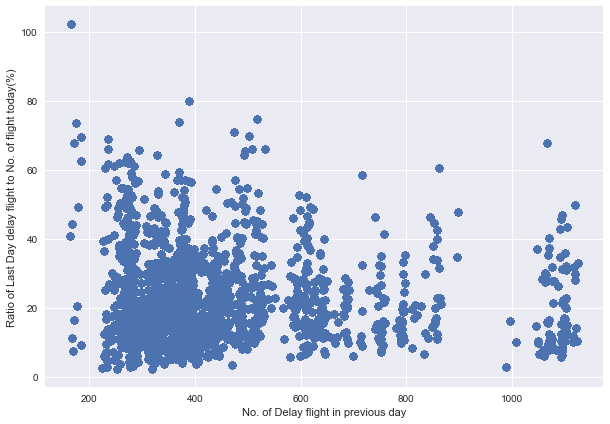

In [36]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 7))

plt.scatter(df['AptNoOfFlight'], 100 * df['AptPreviousDateDelay']/df['AptNoOfFlight'])
plt.ylabel('Ratio of Last Day delay flight to No. of flight today(%)')
plt.xlabel('No. of Delay flight in previous day')
plt.show()

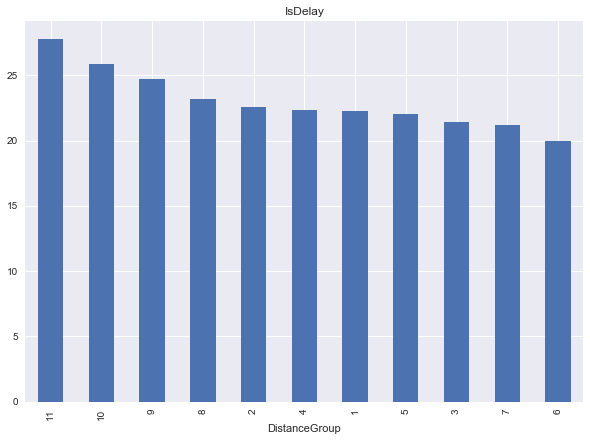

In [48]:
#Delay ratio against distance group of a flight

df_distancegroup_delay = 100 * df.groupby(['DistanceGroup'])['IsDelay'].sum()/df.groupby(['DistanceGroup'])['IsDelay'].count()
df_distancegroup_delay.sort_values(ascending=False).plot(kind='bar', subplots=True, figsize=(10,7))
plt.show()

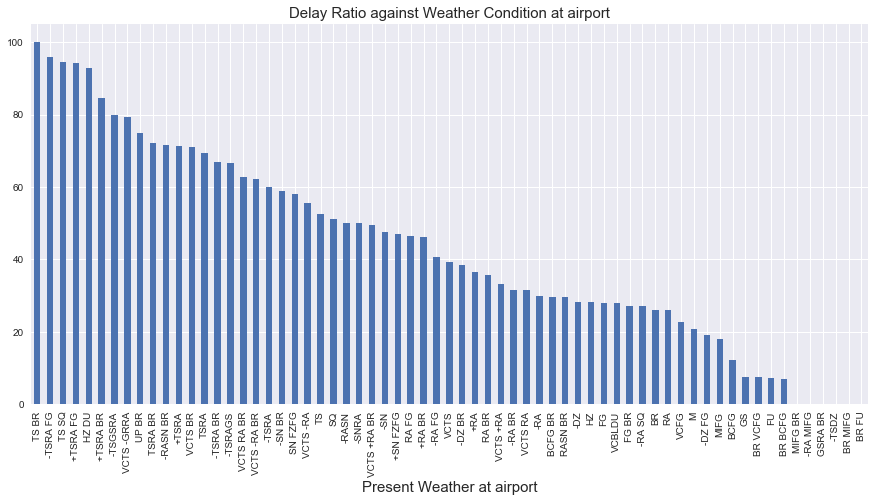

In [53]:
df_distancegroup_delay = 100 * df.groupby([' presentwx'])['IsDelay'].sum()/df.groupby([' presentwx'])['IsDelay'].count()
df_distancegroup_delay.sort_values(ascending=False).plot(kind='bar', subplots=True, figsize=(15,7))
plt.title('Delay Ratio against Weather Condition at airport', size=15)
plt.xlabel('Present Weather at airport', size=15)
plt.show()